In [1]:
from google.colab import files
uploaded = files.upload()

Saving car details v4.csv to car details v4.csv


Final Oja (Hebbian) Weights:

price                : 0.03160
year                 : 0.61242
kilometer            : 0.02286
length               : 0.35553
width                : 0.28992
height               : 0.37493
seating capacity     : 0.41463
fuel tank capacity   : 0.31777


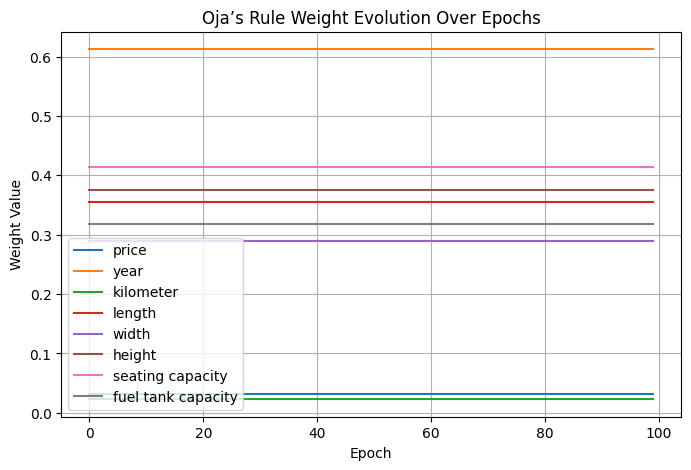

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# --- Load Dataset ---
data = pd.read_csv("car details v4.csv")
data.columns = data.columns.str.strip().str.lower()

# --- Select numeric features ---
numeric_cols = ['price', 'year', 'kilometer', 'length', 'width', 'height',
                'seating capacity', 'fuel tank capacity']
X = data[numeric_cols].dropna()

# --- Normalize data ---
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# --- Initialize weights ---
n_features = X_scaled.shape[1]
weights = np.random.rand(n_features) * 0.01  # small random values
eta = 0.01
epochs = 100

# --- Oja’s Learning Rule ---
weights_history = []
for epoch in range(epochs):
    for x in X_scaled:
        y = np.dot(weights, x)
        dw = eta * (y * x - (y**2) * weights)
        weights += dw
    weights_history.append(weights.copy())

# --- Display results ---
print("Final Oja (Hebbian) Weights:\n")
for f, w in zip(numeric_cols, weights):
    print(f"{f:20s} : {w:.5f}")

# --- Plot weight evolution ---
weights_history = np.array(weights_history)
plt.figure(figsize=(8,5))
for i, f in enumerate(numeric_cols):
    plt.plot(weights_history[:, i], label=f)
plt.title("Oja’s Rule Weight Evolution Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Weight Value")
plt.legend()
plt.grid(True)
plt.show()
#print(X.corr()['year'].sort_values(ascending=False))

